# Rape Cases in India

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_rape = pd.read_csv('20_Victims_of_rape.csv',delimiter=',')

In [3]:
df_rape

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


# 1 --> Yearwise Rape Cases Reported

In [4]:
df_cases = df_rape[['Year','Rape_Cases_Reported']]

In [5]:
df_cases

,Year,Rape_Cases_Reported
0,2001,3
1,2001,1
2,2001,2
3,2002,2
4,2002,0
...,...,...
1045,2009,3
1046,2009,2333
1047,2010,2311
1048,2010,4


In [6]:
agg1 = df_cases.groupby(['Year']).sum()

In [7]:
agg1

,Rape_Cases_Reported
Year,
2001,32150
2002,32746
2003,31694
2004,36466
2005,36718
2006,38696
2007,41474
2008,42934
2009,42794


#### Here we have the yearwise data of the rape cases that have been reported

In [8]:
ag = agg1.reset_index()

## Q(1) In which year were the maximum reported cases and how much?

In [9]:
print(agg1[agg1.Rape_Cases_Reported == agg1.Rape_Cases_Reported.max()])

      Rape_Cases_Reported
Year                     
2010                44344


## Q(2) In which year were the minimum reported cases and how much?

In [10]:
print(agg1[agg1.Rape_Cases_Reported == agg1.Rape_Cases_Reported.min()])

      Rape_Cases_Reported
Year                     
2003                31694


In [11]:
agg1.describe()

,Rape_Cases_Reported
count,10.000000
mean,38001.600000
std,4780.928854
min,31694.000000
25%,33676.000000
50%,37707.000000
75%,42464.000000
max,44344.000000


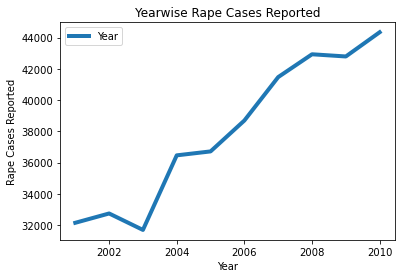

In [12]:
plt.plot(ag.Year, ag.Rape_Cases_Reported, linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy');
plt.xlabel("Year")
plt.ylabel("Rape Cases Reported")
plt.title("Yearwise Rape Cases Reported")
plt.legend(['Year']);

### By the above graph we can clearly see that in 2002 therre were more cases then 2001 & 2003 and from 2003 we can see the gradual increase in the rape cases.

# 2 --> Statewise Rape Cases Reported

#### As we saw earlier we got the yearwise data baout the rape cases and we also visualised it with the help of linegraph.

#### Now, let us know more about it by obtaining the statewise metrics.



In [13]:
state_df = df_rape[['Area_Name','Rape_Cases_Reported']]

In [14]:
state_df

,Area_Name,Rape_Cases_Reported
0,Andaman & Nicobar Islands,3
1,Andaman & Nicobar Islands,1
2,Andaman & Nicobar Islands,2
3,Andaman & Nicobar Islands,2
4,Andaman & Nicobar Islands,0
...,...,...
1045,West Bengal,3
1046,West Bengal,2333
1047,West Bengal,2311
1048,West Bengal,4


In [15]:
agg = state_df.groupby(['Area_Name']).sum()

In [16]:
ag1 = agg.reset_index()

## Q(3) In which state were the maximum reported cases and how much?

In [17]:
print(agg[agg.Rape_Cases_Reported == agg.Rape_Cases_Reported.max()])

                Rape_Cases_Reported
Area_Name                          
Madhya Pradesh                58512


## Q(4) In which state were the minimum reported cases and how much?

In [18]:
print(agg[agg.Rape_Cases_Reported == agg.Rape_Cases_Reported.min()])

             Rape_Cases_Reported
Area_Name                       
Lakshadweep                   14


In [19]:
agg.describe()

,Rape_Cases_Reported
count,35.000000
mean,10857.600000
std,13164.879882
min,14.000000
25%,537.000000
50%,6674.000000
75%,18611.000000
max,58512.000000


In [20]:
df = df_rape[~df_rape['Subgroup'].isin(['Total Rape Victims'])]

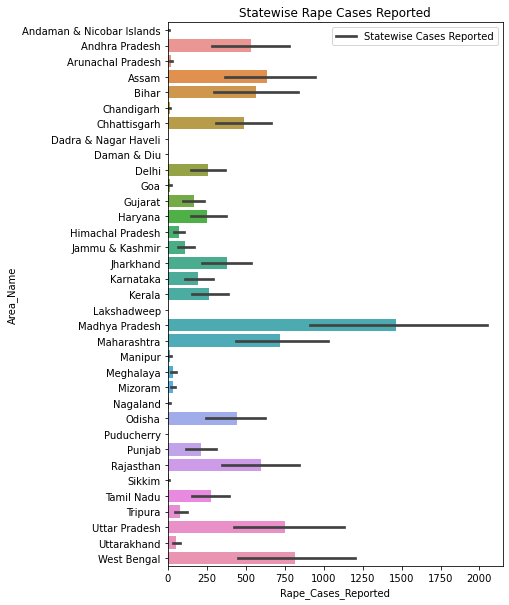

In [21]:
plt.subplots(figsize=(6,10))
sns.barplot("Rape_Cases_Reported","Area_Name",data=df)
plt.title("Statewise Rape Cases Reported")
plt.legend(['Statewise Cases Reported'])
plt.show()

#### Here we can see the amout of the rape cases that have been reported statewise. We can clearly see in the graph that Madhya Pradesh has the highest amout of rape cases reported.



# 3--> Agewise Rape Cases Reported

#### Until now we obtained the metrics of data yearwise and statewise now let us know more about the agewise data and draw conclusions regarding the same.



In [22]:
agewise_rape = df_rape.sum(axis =0)

In [23]:
agewise_data = agewise_rape[4:9]

In [24]:
agewise_data

Victims_Above_50_Yrs           1960
Victims_Between_10-14_Yrs     24840
Victims_Between_14-18_Yrs     55740
Victims_Between_18-30_Yrs    223584
Victims_Between_30-50_Yrs     63248
dtype: object

In [25]:
agewise_data.max()

223584

## Q(5) Of what Age were the maximum reported cases and how much?

In [26]:
print(agewise_data[agewise_data == agewise_data.max()])

Victims_Between_18-30_Yrs    223584
dtype: object


## Q(6) Of what Age were the minimum reported cases and how much?


In [27]:
print(agewise_data[agewise_data == agewise_data.min()])

Victims_Above_50_Yrs    1960
dtype: object


In [28]:
agewise_data_dict = dict(agewise_rape[4:9])

In [29]:
agewise_data_dict

{'Victims_Above_50_Yrs': 1960,
 'Victims_Between_10-14_Yrs': 24840,
 'Victims_Between_14-18_Yrs': 55740,
 'Victims_Between_18-30_Yrs': 223584,
 'Victims_Between_30-50_Yrs': 63248}

In [30]:
a_simple = pd.DataFrame(agewise_data_dict,index=['Rape_Cases'])

In [31]:
a_transposed = a_simple.T

In [32]:
a_ri = a_transposed.reset_index()

In [33]:
a_ri

,index,Rape_Cases
0,Victims_Above_50_Yrs,1960
1,Victims_Between_10-14_Yrs,24840
2,Victims_Between_14-18_Yrs,55740
3,Victims_Between_18-30_Yrs,223584
4,Victims_Between_30-50_Yrs,63248


In [34]:
a_ri.columns = ['Age','Rape_Cases']

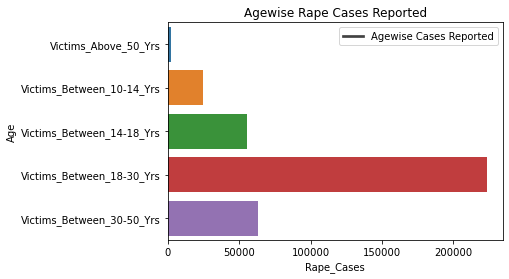

In [35]:
sns.barplot('Rape_Cases','Age',data=a_ri);
plt.title('Agewise Rape Cases Reported')
plt.legend(['Agewise Cases Reported'])
plt.show()

#### By the above graph we clearly can visualize the maximum and minimum cases reported. Maximum victims are of Age between 18-30 years and minimum are of above 50 years.


# 4-->Overall Year&Statewise Rape Cases Reported

#### We saw seperately the yearwise and statewise metrics of the reported cases but lets see which was the worst year that is which in which year and the state reported the maximum and minimum cases.

In [36]:
state_Year_df = df_rape[['Area_Name','Year','Rape_Cases_Reported']]

In [37]:
state_Year_df

,Area_Name,Year,Rape_Cases_Reported
0,Andaman & Nicobar Islands,2001,3
1,Andaman & Nicobar Islands,2001,1
2,Andaman & Nicobar Islands,2001,2
3,Andaman & Nicobar Islands,2002,2
4,Andaman & Nicobar Islands,2002,0
...,...,...,...
1045,West Bengal,2009,3
1046,West Bengal,2009,2333
1047,West Bengal,2010,2311
1048,West Bengal,2010,4


In [38]:
type_df = state_Year_df.groupby(['Year','Area_Name']).sum()

In [39]:
type_df

Rape_Cases_Reported
Year Area_Name                                     
2001 Andaman & Nicobar Islands                    6
     Andhra Pradesh                            1742
     Arunachal Pradesh                           66
     Assam                                     1634
     Bihar                                     1776
...                                             ...
2010 Tamil Nadu                                1372
     Tripura                                    476
     Uttar Pradesh                             3126
     Uttarakhand                                242
     West Bengal                               4622

[350 rows x 1 columns]

## Q(7) In which year a state reported the maximum cases?

In [40]:
print(type_df[type_df.Rape_Cases_Reported == type_df.Rape_Cases_Reported.max()])

                     Rape_Cases_Reported
Year Area_Name                          
2010 Madhya Pradesh                 6270


## Q(8) In which Year a state reported the minimum cases?

In [41]:
print(type_df[type_df.Rape_Cases_Reported == type_df.Rape_Cases_Reported.min()])

                  Rape_Cases_Reported
Year Area_Name                       
2001 Daman & Diu                    0
     Lakshadweep                    0
2002 Daman & Diu                    0
2004 Lakshadweep                    0
2005 Lakshadweep                    0
2006 Lakshadweep                    0
2008 Daman & Diu                    0
2010 Lakshadweep                    0


In [42]:
type_df.describe()

,Rape_Cases_Reported
count,350.000000
mean,1085.760000
std,1332.053214
min,0.000000
25%,50.500000
50%,585.000000
75%,1815.500000
max,6270.000000


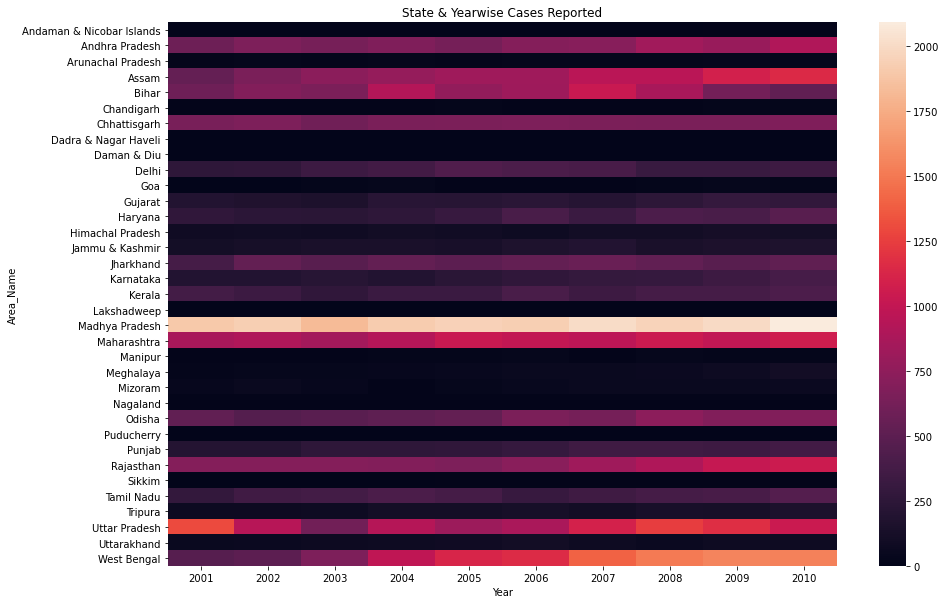

In [43]:
sy = df_rape.pivot_table(index='Area_Name',columns='Year',values='Rape_Cases_Reported')
plt.subplots(figsize=(15,10))
plt.title('State & Yearwise Cases Reported')
sns.heatmap(sy);

#### The above plot that we did is known as heatmap. By this we can clearly visualise that which state reported how many rape cases in particular year.


# 5--> Subgroup of Rape Cases Reported


#### Let us chaeck which in which sybgroup were the maximum and minim cases reported.



In [44]:
df = df_rape[~df_rape['Subgroup'].isin(['Total Rape Victims'])]

In [45]:
df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
5,Andaman & Nicobar Islands,2002,Victims of Other Rape,2,0,0,1,1,0,2,0
7,Andaman & Nicobar Islands,2003,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1043,West Bengal,2008,Victims of Other Rape,2254,1,51,53,1628,504,2254,17
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [46]:
a = df[['Subgroup','Rape_Cases_Reported']]

In [47]:
a

,Subgroup,Rape_Cases_Reported
1,Victims of Incest Rape,1
2,Victims of Other Rape,2
4,Victims of Incest Rape,0
5,Victims of Other Rape,2
7,Victims of Incest Rape,0
...,...,...
1043,Victims of Other Rape,2254
1045,Victims of Incest Rape,3
1046,Victims of Other Rape,2333
1048,Victims of Incest Rape,4


In [48]:
b = a.groupby(['Subgroup']).sum()

In [49]:
b

,Rape_Cases_Reported
Subgroup,
Victims of Incest Rape,4216
Victims of Other Rape,185792


#### Here we come to know that the victims of incest rape were 4216 and the victims of other rape were 185792 which is very high then incest rape.

### What is Incest Rape?

#### In Laymen's language the incest rape is kind of rape that is done to the known person that is anyway a relative to you.



## Q(9) In which subgroup the maximum cases were reported and how much?

In [50]:
print(b[b.Rape_Cases_Reported == b.Rape_Cases_Reported.max()])

                       Rape_Cases_Reported
Subgroup                                  
Victims of Other Rape               185792


## Q(10) In which subgroup the minimum cases were reported and how much?

In [51]:
print(b[b.Rape_Cases_Reported == b.Rape_Cases_Reported.min()])

                        Rape_Cases_Reported
Subgroup                                   
Victims of Incest Rape                 4216


In [52]:
b.describe()

,Rape_Cases_Reported
count,2.000000
mean,95004.000000
std,128393.620901
min,4216.000000
25%,49610.000000
50%,95004.000000
75%,140398.000000
max,185792.000000


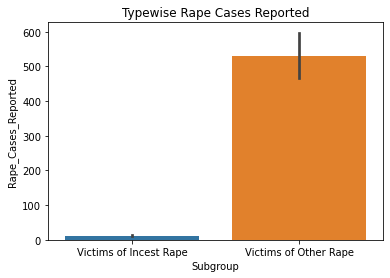

In [53]:
sns.barplot('Subgroup','Rape_Cases_Reported',data = df);
plt.title("Typewise Rape Cases Reported")
plt.show()

#### Here we can visualize with thw hwlp of graph that the victims of incest rape cases are minimum whereas the victims of other rape are maximum.



# Visualising More Through Graphs

## State & Yearwise Reported Cases

### (1) Barplots


C:\Users\Master\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


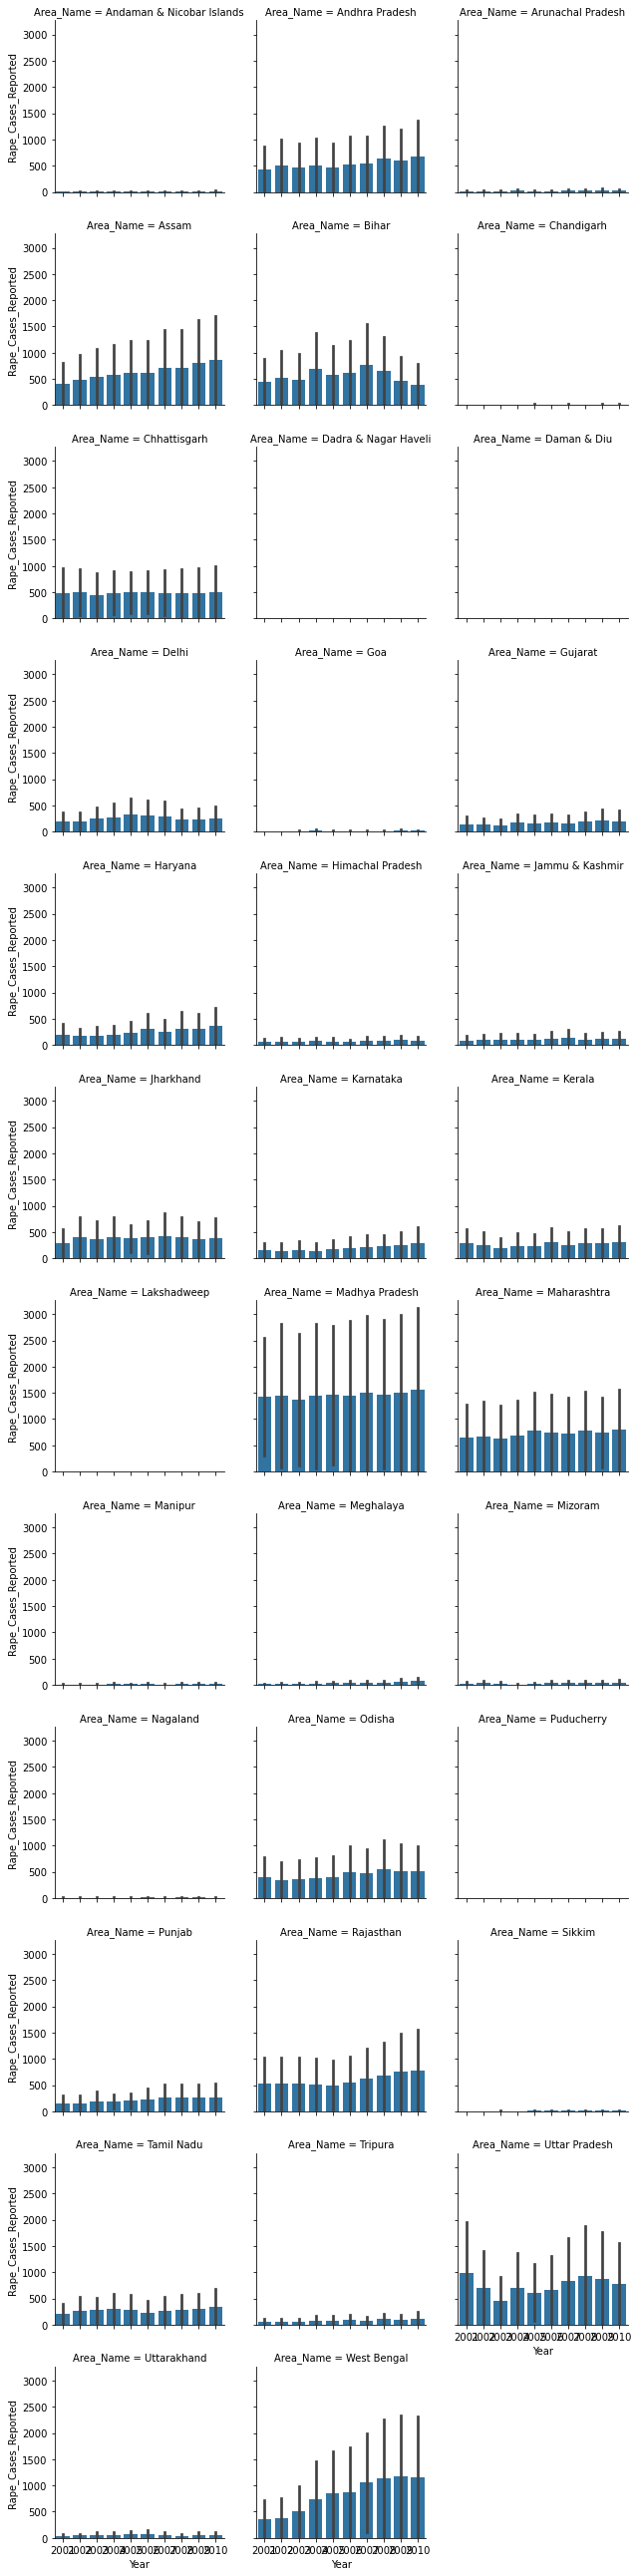

In [54]:
g = sns.FacetGrid(data=df,col='Area_Name',col_wrap = 3)
g.map(sns.barplot,"Year","Rape_Cases_Reported") 
plt.show()

### (2) Lineplots

C:\Users\Master\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


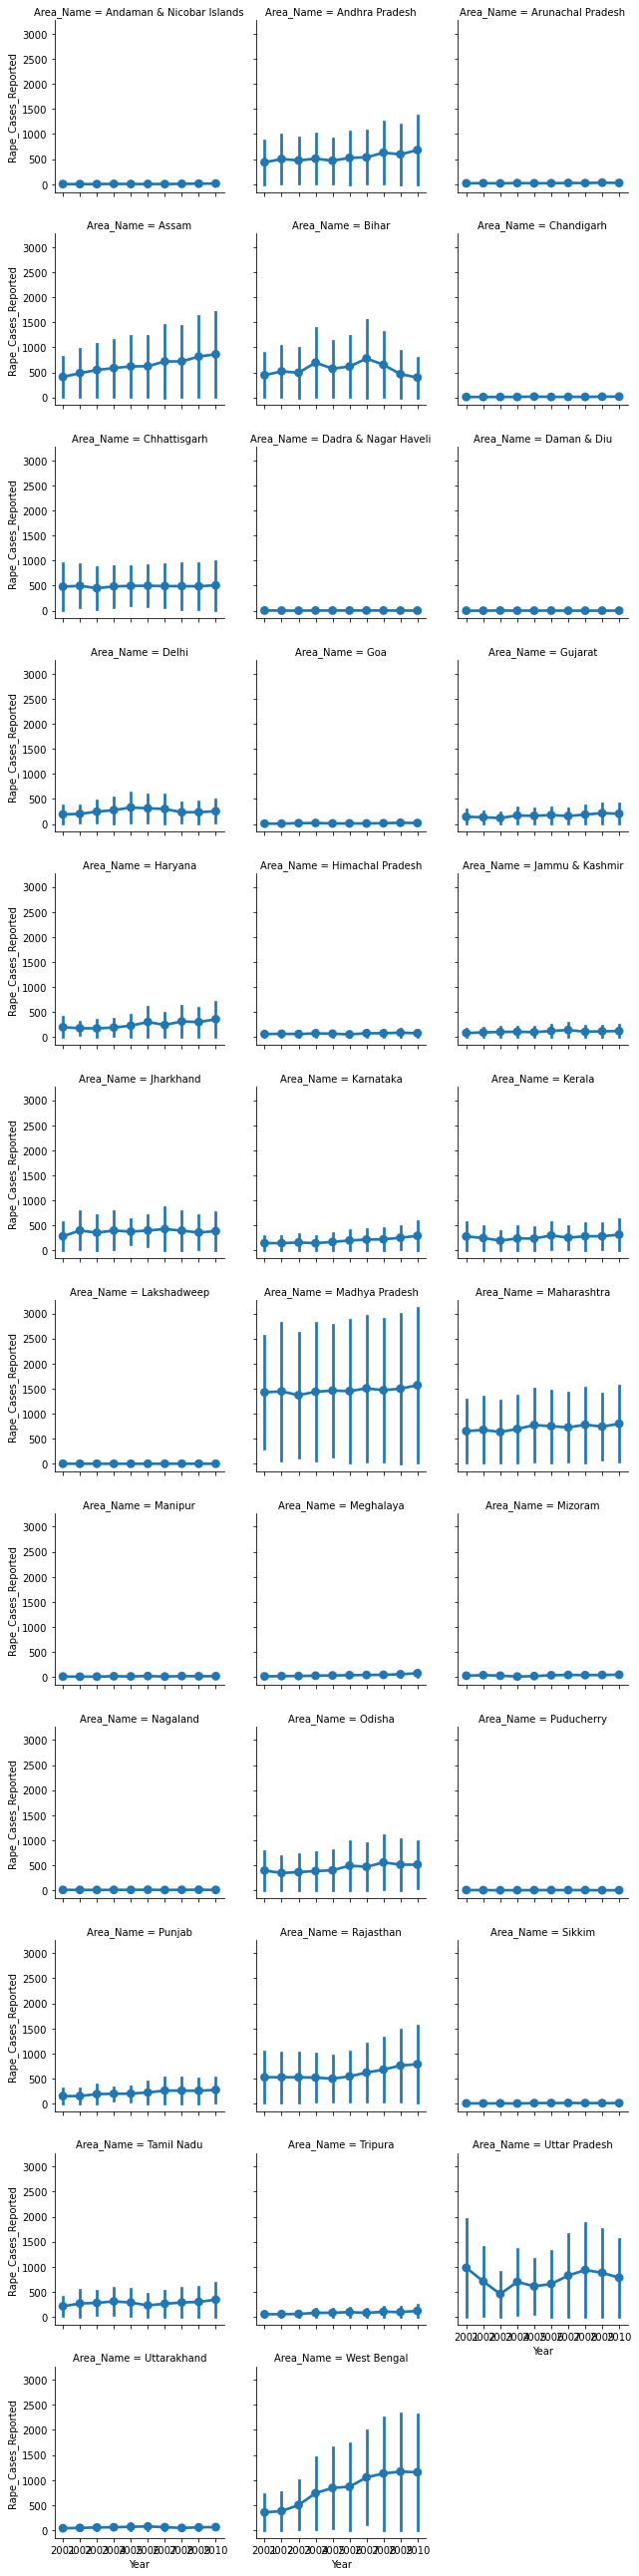

In [55]:
g = sns.FacetGrid(data=df,col='Area_Name',col_wrap = 3)
g.map(sns.pointplot,"Year","Rape_Cases_Reported") 
plt.show()

### So here we come to an end of the case study on the reported cases and we concluded many information such as:

#### (1) Yearwise minimun and maximum rape cases reported
#### (2) Statewise minimum and maximum rape cases reported
#### (3) Agewise minimum and maximum rape cases reported
#### (4) Stae & Yearwise rape cases reported
#### (5) Typewise minimum and maximum rape cases reported